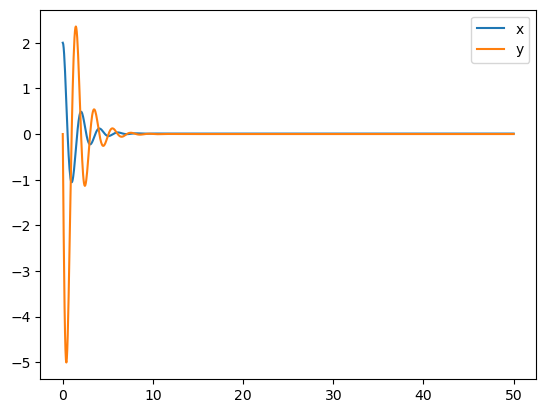

In [2]:
import numpy as np
import scipy.integrate as spi
import scipy.linalg as spla
import matplotlib.pyplot as plt
import control

# Constants
a = 10
b = 1
c = 1

# State space representation of Lorentz system
def lorentz_sys(x, t, u):
    xdot = np.zeros(2)
    xdot[0] = x[1]
    xdot[1] = -a * x[0] - b * x[1] - c * x[0]**2 + u
    return xdot

# LQR design
Q = np.array([[1, 0], [0, 1]])
R = np.array([[1]])

A = np.array([[0, 1], [-a, -b]])
B = np.array([[0], [1]])

P = spla.solve_continuous_are(A, B, Q, R)
K = np.dot(np.linalg.inv(R), np.dot(B.T, P))

# LQG design
Q_w = np.array([[0.1, 0], [0, 0.1]])
R_v = np.array([[0.1]])

C = np.array([[1, 0]])
L = control.dare(A.T, C.T, Q_w, R_v)[0].T # Correction, changed function to 'dare' from 'lqr'

# Closed-loop simulation
x0 = np.array([2, 0])
u = 0

t = np.linspace(0, 50, 1000)
x = spi.odeint(lambda x, t: lorentz_sys(x, t, -np.dot(K, (x - x0)) + u), x0, t)

plt.plot(t, x[:, 0], label='x')
plt.plot(t, x[:, 1], label='y')
plt.legend()
plt.show()
